In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('online_retail.csv')

In [3]:
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


#### Checking for missing values


In [4]:
dataset['InvoiceNo'].isna().sum()

0

In [5]:
dataset['StockCode'].isna().sum()

0

In [6]:
dataset['Description'].isna().sum()

1454

In [7]:
dataset['Quantity'].isna().sum()

0

In [8]:
dataset['InvoiceDate'].isna().sum()

0

In [9]:
dataset['UnitPrice'].isna().sum()

0

In [10]:
dataset['CustomerID'].isna().sum()

135080

In [11]:
dataset['Country'].isna().sum()

0

So CustomerID and Description are having missing values

In [12]:
# Removing the NULL CustomerID rows

dataset = dataset[dataset['CustomerID'].isna() == False]

And by removing the NULL values in CustomerID the null values present in the Description column also got removed

Now we have to exclude cancelled Invoices , i.e, Invoices Starting with the alphabet 'C'

In [13]:
dataset['InvoiceNo'].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: count, Length: 22190, dtype: int64

In [14]:
invoices_starting_with_C = dataset['InvoiceNo'].astype(str).str.startswith('C')

In [15]:
invoices_starting_with_C.value_counts()

InvoiceNo
False    397924
True       8905
Name: count, dtype: int64

In [16]:
# With this code the Invoice no's Starting with 'C' are removed
# In the code below basically the InvoiceNo's that started with 'C' were not copied('~') 


dataset = dataset[~dataset['InvoiceNo'].astype(str).str.startswith('C')].copy()

Now we have to remove negative or zero quantities and prices

In [17]:
dataset['Quantity'].value_counts()

Quantity
1        73314
12       60033
2        58003
6        37688
4        32183
         ...  
4300         1
608          1
738          1
552          1
80995        1
Name: count, Length: 302, dtype: int64

In [18]:
(dataset['Quantity'] > 0 ).value_counts()

Quantity
True    397924
Name: count, dtype: int64

In [19]:
(dataset['UnitPrice'] > 0 ).value_counts()

UnitPrice
True     397884
False        40
Name: count, dtype: int64

So from the above there are total 40 values in prices that are <= 0. So we have to remove them 

In [20]:
dataset = dataset[dataset['UnitPrice'] > 0]

In [21]:
(dataset['UnitPrice'] > 0 ).value_counts()

UnitPrice
True    397884
Name: count, dtype: int64

All UnitPrice Values <= 0 were removed

## EDA (Exploratory Data Analysis)

#### Analyze transaction volume by country

In [22]:
# Transaction Volume = Unique invoice no
uniq_transaction = []

uniq_transaction = dataset['InvoiceNo'].unique()

In [23]:
uniq_transaction = uniq_transaction.tolist()

In [24]:
uniq_transaction

['536365',
 '536366',
 '536367',
 '536368',
 '536369',
 '536370',
 '536371',
 '536372',
 '536373',
 '536374',
 '536375',
 '536376',
 '536377',
 '536378',
 '536380',
 '536381',
 '536382',
 '536384',
 '536385',
 '536386',
 '536387',
 '536388',
 '536389',
 '536390',
 '536392',
 '536393',
 '536394',
 '536395',
 '536396',
 '536397',
 '536398',
 '536399',
 '536400',
 '536401',
 '536402',
 '536403',
 '536404',
 '536405',
 '536406',
 '536407',
 '536408',
 '536409',
 '536412',
 '536415',
 '536416',
 '536420',
 '536423',
 '536425',
 '536437',
 '536446',
 '536460',
 '536463',
 '536464',
 '536466',
 '536477',
 '536488',
 '536500',
 '536502',
 '536508',
 '536514',
 '536520',
 '536521',
 '536522',
 '536523',
 '536524',
 '536525',
 '536526',
 '536527',
 '536528',
 '536529',
 '536530',
 '536531',
 '536532',
 '536533',
 '536534',
 '536535',
 '536536',
 '536537',
 '536538',
 '536539',
 '536540',
 '536541',
 '536542',
 '536551',
 '536556',
 '536557',
 '536559',
 '536560',
 '536561',
 '536562',
 '536563',

In [25]:
country = []

country = dataset['Country']

In [ ]:
transaction_volume_by_country = dataset.groupby('Country')['InvoiceNo'].nunique()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
transaction_volume_by_country.values

array([   57,    17,     2,    98,     1,     6,    26,    16,     2,
          18,   260,     4,    41,   389,   457,     5,     7,     5,
          38,    19,     1,     4,     5,    94,    36,    19,    57,
           1,     1,     7,    90,    36,    51,     5,     3, 16646,
           8], dtype=int64)

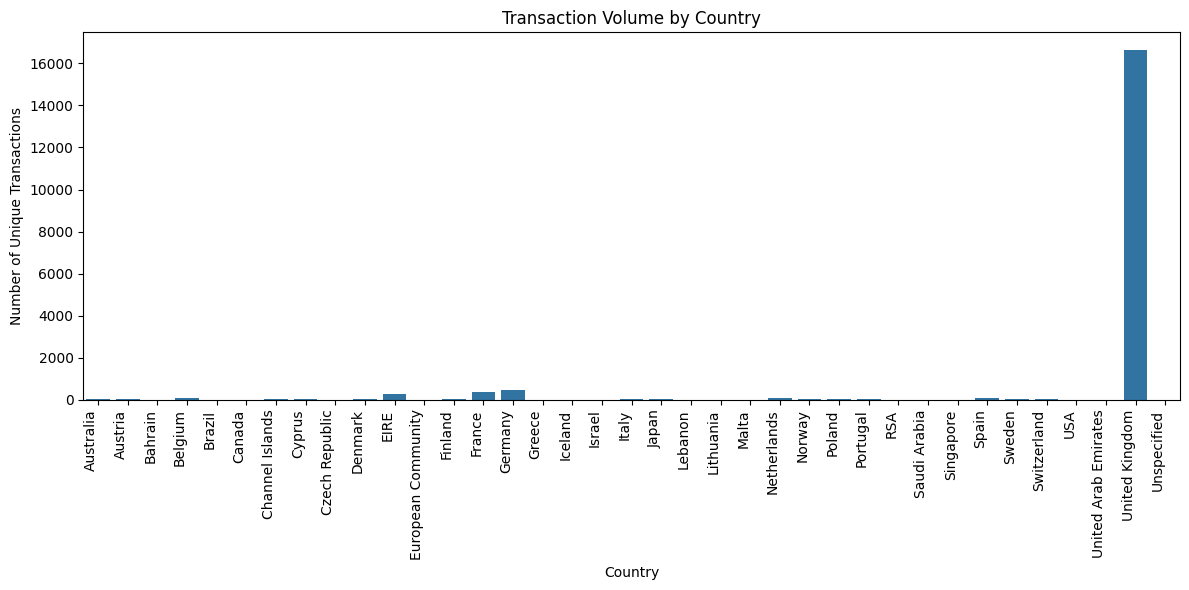

In [29]:
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.barplot(x=transaction_volume_by_country.index, y=transaction_volume_by_country.values)
plt.title('Transaction Volume by Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique Transactions')
plt.xticks(rotation=90, ha='right') # Rotate labels if many countries
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#### Top Selling Products

In [30]:
top_selling_product = dataset.groupby('Description')['Quantity'].sum().sort_values(ascending = False)

In [31]:
top_selling_product.values

array([80995, 77916, 54415, ...,     1,     1,     1], dtype=int64)

In [32]:
top_selling_product.index

Index(['PAPER CRAFT , LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR',
       'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT',
       'WHITE HANGING HEART T-LIGHT HOLDER', 'ASSORTED COLOUR BIRD ORNAMENT',
       'PACK OF 72 RETROSPOT CAKE CASES', 'POPCORN HOLDER',
       'RABBIT NIGHT LIGHT', 'MINI PAINT SET VINTAGE ',
       ...
       'SILVER AND BLACK ORBIT NECKLACE', 'ORANGE FELT VASE + FLOWERS',
       'CRACKED GLAZE EARRINGS RED', 'CRACKED GLAZE EARRINGS BROWN',
       'PACK 4 FLOWER/BUTTERFLY PATCHES',
       'BLACK VINT ART DEC CRYSTAL BRACELET', 'FLOWER SHOP DESIGN MUG',
       'SET 36 COLOURING PENCILS DOILEY', 'HEN HOUSE W CHICK IN NEST',
       'AMBER BERTIE GLASS BEAD BAG CHARM'],
      dtype='object', name='Description', length=3877)

In [33]:
top_selling_product.index.value_counts()

Description
PAPER CRAFT , LITTLE BIRDIE          1
CUSHION COVER PINK UNION JACK        1
FLOWER BLUE CLOCK WITH SUCKER        1
ASSORTED TUTTI FRUTTI LARGE PURSE    1
IVORY WIRE KITCHEN ORGANISER         1
                                    ..
FELTCRAFT HAIRBAND RED AND BLUE      1
CHILDS GARDEN FORK PINK              1
PINK OWL SOFT TOY                    1
EGG CUP NATURAL CHICKEN              1
AMBER BERTIE GLASS BEAD BAG CHARM    1
Name: count, Length: 3877, dtype: int64

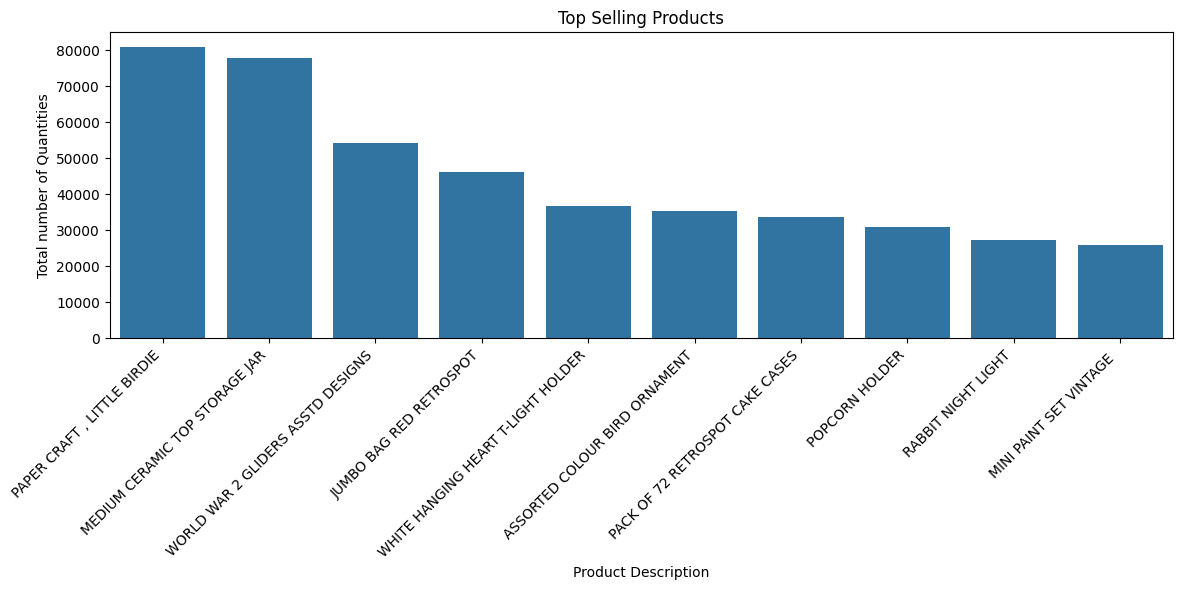

In [34]:
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.barplot(x=top_selling_product.head(10).index, y=top_selling_product.head(10).values)
plt.title('Top Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total number of Quantities')
plt.xticks(rotation=45, ha='right') # Rotate labels if many countries
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#### Visualize purchase trends over time

In [35]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'], errors='coerce')

In [36]:
# 2. Remove rows where InvoiceDate became NaT (if any were unparseable)
dataset.dropna(subset=['InvoiceDate'], inplace=True)

In [37]:
dataset_indexed = dataset.set_index('InvoiceDate')

In [38]:
dataset_indexed

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2022-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2022-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2022-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2022-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2022-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2023-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2023-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2023-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


In [39]:
daily_unique_transactions = dataset_indexed['InvoiceNo'].resample('D').nunique().fillna(0)

In [40]:
# no of Unique Transaction along with the date

daily_unique_transactions

InvoiceDate
2022-12-01    121
2022-12-02    137
2022-12-03     57
2022-12-04      0
2022-12-05     87
             ... 
2023-12-05    116
2023-12-06    110
2023-12-07    104
2023-12-08    113
2023-12-09     41
Freq: D, Name: InvoiceNo, Length: 374, dtype: int64

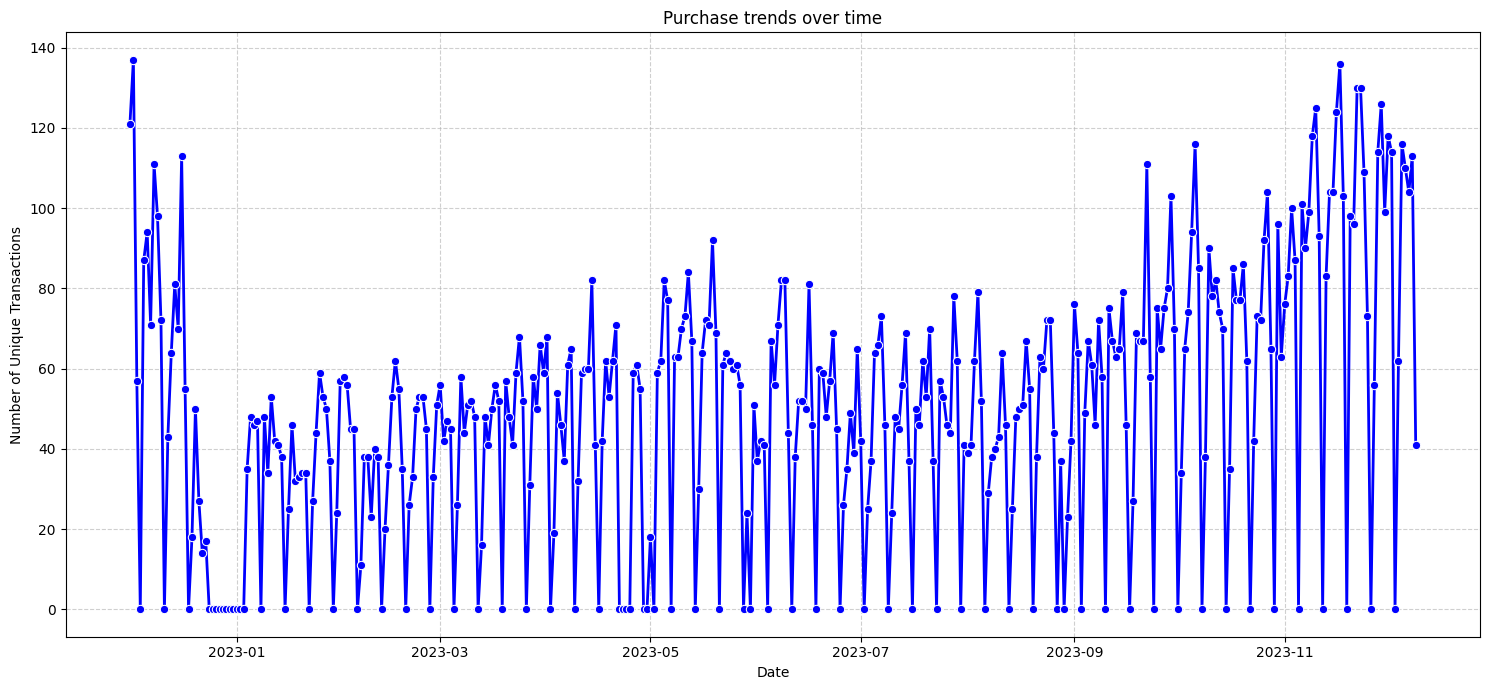

In [41]:
plt.figure(figsize=(15,7))
sns.lineplot(x =daily_unique_transactions.index , y = daily_unique_transactions.values, marker='o', linewidth=2, color='blue')
plt.title('Purchase trends over time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Transactions')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Monetary distribution per transaction and Customer

In [42]:
dataset['Quantity'] = pd.to_numeric(dataset['Quantity'], errors='coerce')
dataset['UnitPrice'] = pd.to_numeric(dataset['UnitPrice'], errors='coerce')

Removing the missing values in both the columns


In [43]:
dataset.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

In [44]:
dataset = dataset[(dataset['Quantity'] > 0 ) & (dataset['UnitPrice'] > 0)]

Total Price is being calculated

In [45]:
dataset['Total_Price'] = dataset['Quantity'] * dataset['UnitPrice']

In [46]:
# Group by unique InvoiceNo and sum the TotalPrice for each invoice.

total_price_per_transaction = dataset.groupby('InvoiceNo')['Total_Price'].sum()

In [47]:
# Group by unique CustomerID and sum the TotalPrice for each customer.

total_price_per_customer = dataset.groupby('CustomerID')['Total_Price'].sum()

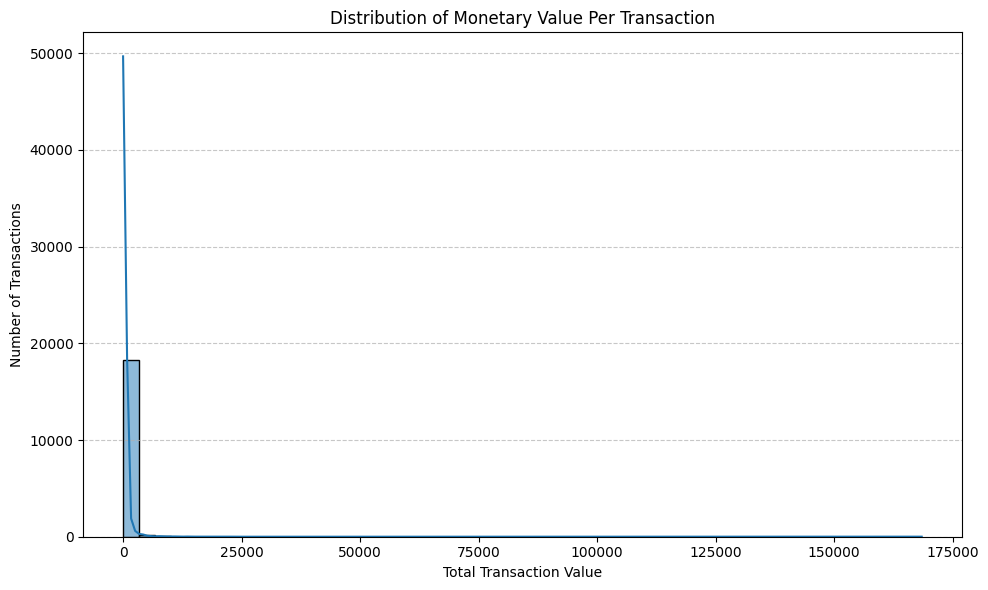

In [48]:
# Plotting the distribution of monetary value per transaction
plt.figure(figsize=(10, 6))
sns.histplot(total_price_per_transaction, bins=50, kde=True)
plt.title('Distribution of Monetary Value Per Transaction')
plt.xlabel('Total Transaction Value')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

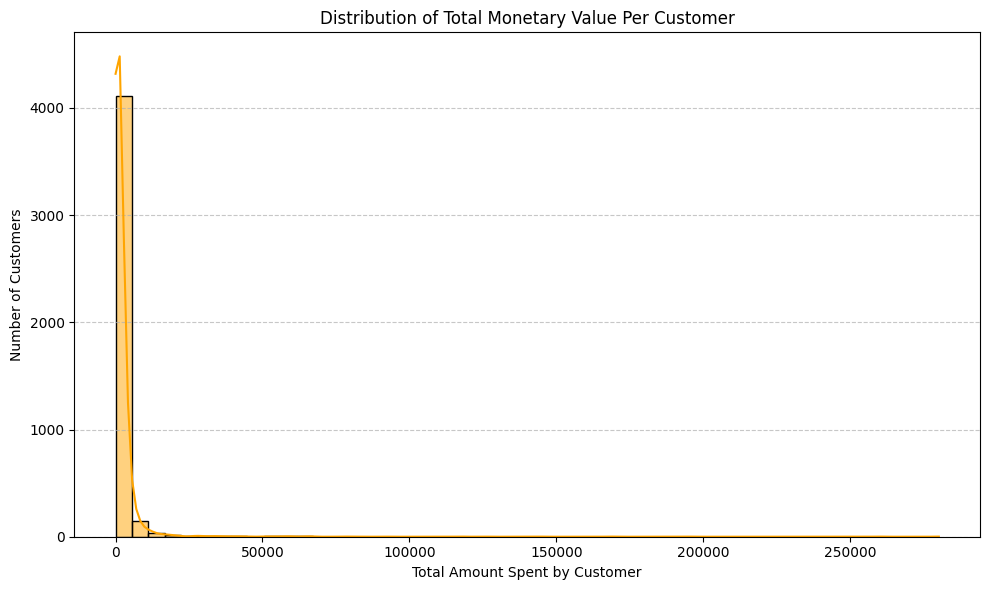

In [49]:
# Plotting the distribution of monetary value per customer
plt.figure(figsize=(10, 6))
sns.histplot(total_price_per_customer, bins=50, kde=True, color='orange')
plt.title('Distribution of Total Monetary Value Per Customer')
plt.xlabel('Total Amount Spent by Customer')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### RFM distributions


In [50]:
dataset.sort_values(by='InvoiceDate', inplace=True)

In [ ]:
# Calculating Recency
# Recency = Latest purchase date in dataset − Customer’s last purchase date

import datetime as dt

latest_purchase_date = dataset['InvoiceDate'].max()
current_date = latest_purchase_date + dt.timedelta(days=1)

In [52]:
customer_last_purchase = dataset.groupby('CustomerID')['InvoiceDate'].max()

# Calculating recency for each customer (in days)
recency_series = (current_date - customer_last_purchase).dt.days

In [53]:
# Calculating the frequency
# Frequency = Number of transactions per customer

frequency_series = dataset.groupby('CustomerID')['InvoiceNo'].nunique()

In [54]:
# Calculating the Monetary 
# Monetary = Total amount spent by customer

total_price_per_customer  # Already Calculated Previously

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Total_Price, Length: 4338, dtype: float64

In [55]:
# Combine all the Series into a single DataFrame

rfm_df = pd.concat([recency_series, frequency_series, total_price_per_customer], axis=1)

<Figure size 1000x800 with 0 Axes>

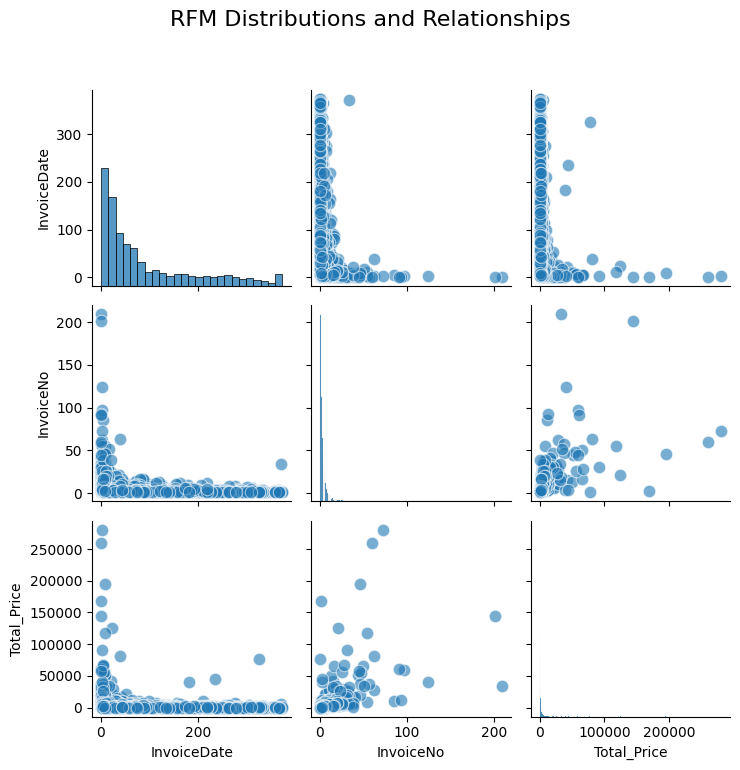

In [56]:
# Pairplot 

plt.figure(figsize = (10,8))
sns.pairplot(rfm_df, diag_kind='hist',
             plot_kws={'alpha': 0.6, 's': 80})

plt.suptitle('RFM Distributions and Relationships', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.show()

In [57]:
# Combining the rfm_df with the dataset

rfm_df = dataset.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (current_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Total_Price', 'sum')
).reset_index()

In [58]:
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05
4336,18283.0,4,16,2094.88


Before combining the rfm dataframe to the dataset we have to standarize the RFM values


In [59]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]

In [60]:
X_scaled = scaler.fit_transform(X_rfm_features)

In [61]:
# Scaled RFM values

rfm_scaled_df = pd.DataFrame(X_scaled, columns=X_rfm_features.columns, index=rfm_df['CustomerID'])


In [74]:
rfm_scaled_df

,Recency,Frequency,Monetary,Cluster,Segment
CustomerID,,,,,
12346.0,2.334574,-0.425097,8.358668,3,High-Value
12347.0,-0.905340,0.354417,0.250966,0,Regular
12348.0,-0.175360,-0.035340,-0.028596,0,Regular
12349.0,-0.735345,-0.425097,-0.033012,0,Regular
12350.0,2.174578,-0.425097,-0.191347,1,Occasional
...,...,...,...,...,...
18280.0,1.854587,-0.425097,-0.208459,1,Occasional
18281.0,0.884612,-0.425097,-0.219560,1,Occasional
18282.0,-0.845342,-0.295178,-0.208742,0,Regular


In [62]:
# So here the columns are added into the datset and named as 'df_merged'

# df_merged = pd.merge(dataset, rfm_scaled_df, on='CustomerID', how='left')


Identifying the optimal no. of k clustures using Elbow and Silhoutte analysis

In [63]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Test k from 2 to 10
k_range = range(2,11)

inertia = []  # WCSS values # For Elbow Method
silhouette_scores = [] # For Silhouette Score

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state = 42, n_init = 10)   # n_init means the no of times the algorithm has to run untill we get the final centroid's of the clustures

    kmeans.fit(rfm_scaled_df)  # Training the model
 
    inertia.append(kmeans.inertia_)  # Storing the WCSS values 

    # Now we will go with the Silhouette Score
    if len(rfm_scaled_df) > 1:  # A check to ensure there's more than one data point
        cluster_labels = kmeans.labels_

        if len(set(cluster_labels)) > 1:  # Ensuring more than one cluster label
            # If the conditions are met calculate the Silhouette scores
            silhouette_avg  = silhouette_score(rfm_scaled_df, cluster_labels)

            silhouette_scores.append(silhouette_avg) 

        else:
            silhouette_scores.append(None)  # if there are less than 1 cluster labels then donot calculate silhouette scores for that cluster

    else:
        silhouette_scores.append(None)

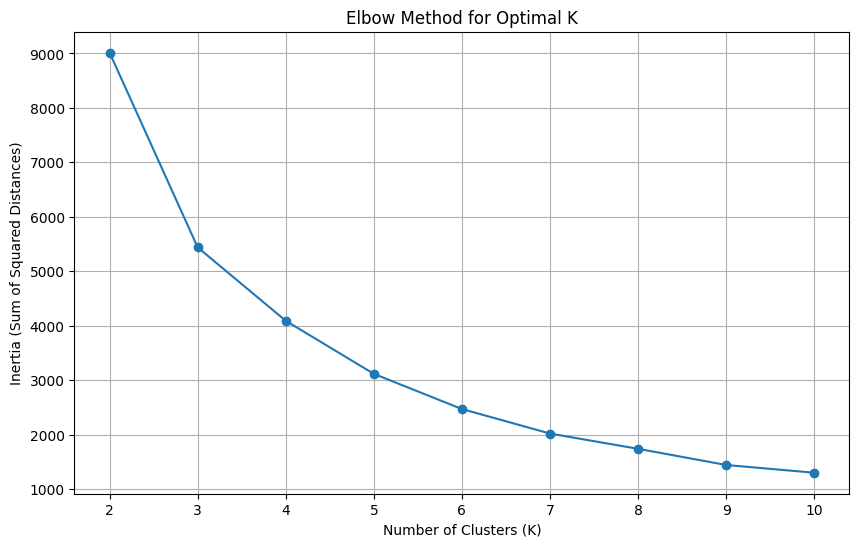

In [64]:
plt.figure(figsize= (10,6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.xticks(k_range)
plt.show()

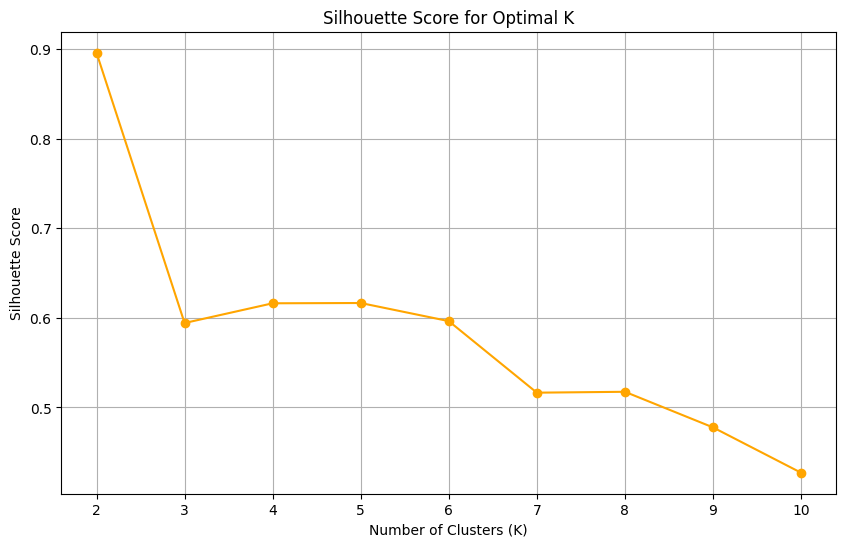

In [65]:
# --- Plotting the Silhouette Scores ---

valid_silhouette_k_range = [k for k, score in zip(k_range, silhouette_scores) if score is not None]
valid_silhouette_scores = [score for score in silhouette_scores if score is not None]

if valid_silhouette_scores:
    plt.figure(figsize=(10, 6))
    plt.plot(valid_silhouette_k_range, valid_silhouette_scores, marker='o', linestyle='-', color='orange')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.xticks(valid_silhouette_k_range)
    plt.show()

else:
    print("Could not calculate Silhouette Score for the given range of K. Ensure your dataset has enough diversity and samples.")


Considering the above plots k=2 is the optimal no of clustures. Now going ahead with the clusturing algorithms but we have to choose a minimum of 4 clusters for the classification


In [66]:
optimal_k = 4

# Building the final kmeans algorithm with the optimal no. of clustures
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Training the model
kmeans_final.fit(rfm_scaled_df)


# Assign cluster labels to both the original and scaled RFM DataFrames
rfm_df['Cluster'] = kmeans_final.labels_
rfm_scaled_df['Cluster'] = kmeans_final.labels_



In [67]:
# --- Step 2: Label the Clusters by Interpreting their RFM Averages ---

cluster_profiles = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

In [68]:
cluster_profiles

,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


In [69]:
cluster_profiles.loc[0,'Recency']

43.7026850032744


Using 0.33 and 0.66 attempts to divide the data into approximate thirds:

-> Values below 0.33 quantile = "Low"

-> Values between 0.33 and 0.66 quantiles = "Medium"

-> Values above 0.66 quantile = "High"

In [70]:
# Define a mapping based on the interpretation of cluster_profiles
cluster_label_mapping = {}

# Iterate through each cluster's profile to assign a label
for cluster_id, profile in cluster_profiles.iterrows():
    # cluster_id will be 0. 
    # profile will be the Series [Recency: 12.25, Frequency: 2.0, Monetary: 33.425] 
    recency = profile['Recency']
    frequency = profile['Frequency']
    monetary = profile['Monetary']

    
    if recency < rfm_df['Recency'].quantile(0.33) and \
       frequency > rfm_df['Frequency'].quantile(0.66) and \
       monetary > rfm_df['Monetary'].quantile(0.66):
        cluster_label_mapping[cluster_id] = 'High-Value' # "Regular, frequent, recent, and big spenders" 
    elif frequency > rfm_df['Frequency'].quantile(0.33) and \
         monetary > rfm_df['Monetary'].quantile(0.33) and \
         recency < rfm_df['Recency'].quantile(0.66): # Not too old
        cluster_label_mapping[cluster_id] = 'Regular' # "Steady purchasers but not premium" 
    elif recency > rfm_df['Recency'].quantile(0.66) and \
         frequency < rfm_df['Frequency'].quantile(0.33) and \
         monetary < rfm_df['Monetary'].quantile(0.33):
        cluster_label_mapping[cluster_id] = 'At-Risk' # "Haven’t purchased in a long time" 
    elif frequency < rfm_df['Frequency'].quantile(0.66) and \
         monetary < rfm_df['Monetary'].quantile(0.66) and \
         recency > rfm_df['Recency'].quantile(0.33): # Not too recent
        cluster_label_mapping[cluster_id] = 'Occasional' # "Rare, occasional purchases" 
    else:
        cluster_label_mapping[cluster_id] = 'Undefined' # Fallback for clusters that don't fit clear categories


In [71]:
# Applying the derived segment labels to RFM DataFrame
rfm_df['Segment'] = rfm_df['Cluster'].map(cluster_label_mapping)
rfm_scaled_df['Segment'] = rfm_scaled_df['Cluster'].map(cluster_label_mapping)

##### Visualize the Clusters (3D Scatter Plot)


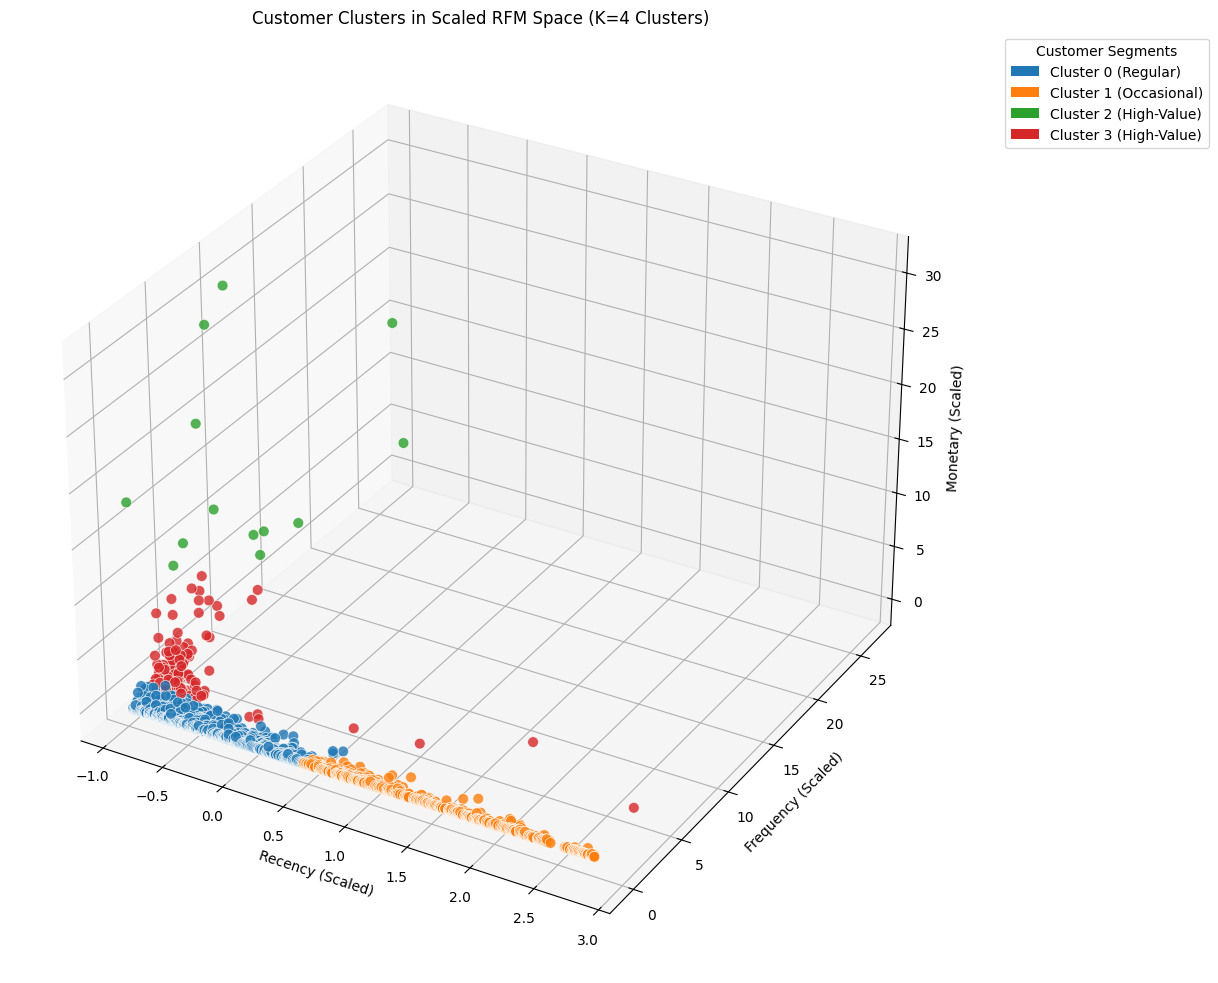

In [72]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Distinct colors for each segment (using numerical cluster labels)
segment_colors = sns.color_palette('tab10', n_colors=optimal_k) # Using optimal_k for colors
point_colors = [segment_colors[label] for label in rfm_scaled_df['Cluster']]

ax.scatter(rfm_scaled_df['Recency'],
           rfm_scaled_df['Frequency'],
           rfm_scaled_df['Monetary'],
           c=point_colors,
           s=60, alpha=0.8, edgecolors='w', linewidth=0.5)

ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary (Scaled)')
ax.set_title(f'Customer Clusters in Scaled RFM Space (K={optimal_k} Clusters)')

# Creating a custom legend using the segment names (from the string labels)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=segment_colors[i], label=f'Cluster {i} ({cluster_label_mapping.get(i, "Undefined_Segment")})')
    for i in sorted(rfm_scaled_df['Cluster'].unique())
]
ax.legend(handles=legend_elements, title="Customer Segments", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()





##### Save the K-Means model and the StandardScaler

In [73]:
import pickle 

kmeans_model_path = 'kmeans_model.pkl'
scaler_path = 'rfm_scaler.pkl'

print("\n--- Saving Models for Streamlit Usage ---")

try:
    with open(kmeans_model_path, 'wb') as file:
        pickle.dump(kmeans_final, file)
    print(f"K-Means model saved successfully to: {kmeans_model_path}")

    with open(scaler_path, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"StandardScaler saved successfully to: {scaler_path}")
except Exception as e:
    print(f"Error saving models: {e}")

print("\nClustering and final steps complete. You can now proceed to build your Streamlit app!")


--- Saving Models for Streamlit Usage ---
K-Means model saved successfully to: kmeans_model.pkl
StandardScaler saved successfully to: rfm_scaler.pkl

Clustering and final steps complete. You can now proceed to build your Streamlit app!
